# Regresión con Bosques Aleatorios

**Contexto**  
Este conjunto de datos consiste en una lista de puestos en una empresa junto con los niveles y su salario asociado.

**Contenido**  
El conjunto de datos incluye columnas para el Puesto con valores que van desde Analista de negocios, Consultor junior hasta CEO, Nivel que varía de 1 a 10 y, finalmente, el Salario asociado con cada puesto que varía de **45,000 a 1,000,000**.

**Planteamiento del problema**  
El enunciado del problema es que el candidato con nivel 6.5 tenía un salario anterior de 160,000. Para contratar al candidato para un nuevo puesto, a la compañía le gustaría confirmar si está siendo honesto acerca de su último salario para que pueda tomar una decisión de contratación . Para hacer esto, haremos uso del método de Regresión Polinómicapara predecir el salario exacto del empleado.

In [1]:
#Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importar el data set
dataset = pd.read_csv('Position_Salaries.csv')
print(dataset)
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
# Generar el Random Forest con el dataset
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(n_estimators = 300, random_state = 0)
regression.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [4]:
# Predicción de nuestros modelos con Random Forest
y_pred = regression.predict([[6.5]])

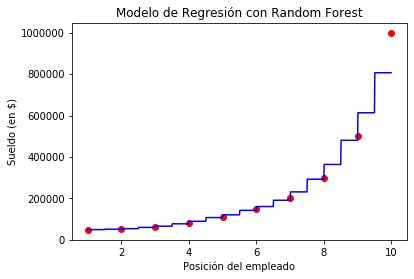


Precisión del modelo:
0.952881406729914


In [5]:
# Visualización de los resultados del Random Forest
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regression.predict(X_grid), color = "blue")
plt.title("Modelo de Regresión con Random Forest")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()
print()
print('Precisión del modelo:')
print(regression.score(X, y))